In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data/laptop_price.csv', encoding="ISO-8859-1")
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [3]:
df.shape

(1303, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   object 
 1   Company           1295 non-null   object 
 2   Product           1295 non-null   object 
 3   TypeName          1295 non-null   object 
 4   Inches            1295 non-null   float64
 5   ScreenResolution  1295 non-null   object 
 6   Cpu               1295 non-null   object 
 7   Ram               1295 non-null   object 
 8   Memory            1295 non-null   object 
 9   Gpu               1295 non-null   object 
 10  OpSys             1295 non-null   object 
 11  Weight            1295 non-null   object 
 12  Price_euros       1295 non-null   float64
dtypes: float64(2), object(11)
memory usage: 132.5+ KB


# Data Cleaning

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

laptop_ID           0
Company             8
Product             8
TypeName            8
Inches              8
ScreenResolution    8
Cpu                 8
Ram                 8
Memory              8
Gpu                 8
OpSys               8
Weight              8
Price_euros         8
dtype: int64

In [7]:
df = df.dropna()
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [8]:
drops = ['laptop_ID', 'Product']

df.drop(columns=drops, inplace=True)

In [9]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [10]:
df['Ram'] = df['Ram'].str.replace('GB', '').astype('int')
df['Weight'] = df['Weight'].str.replace('kg', '').astype('float')

In [11]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


# EDA &  Preprocessing

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\Lenovo\rekru_modelling\Supervised\myenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price_euros', ylabel='Density'>

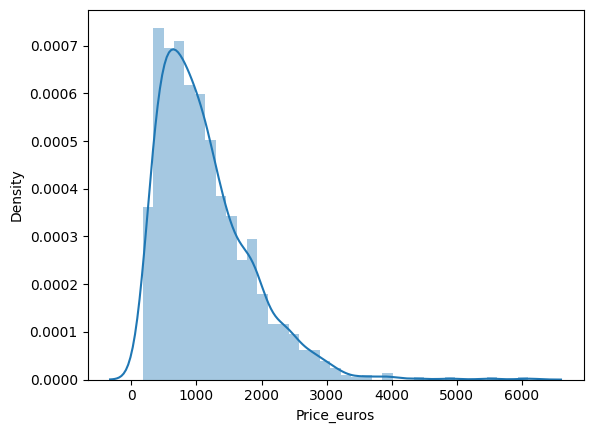

In [13]:
sns.distplot(df['Price_euros'])

Price_euros = skew right

<AxesSubplot:>

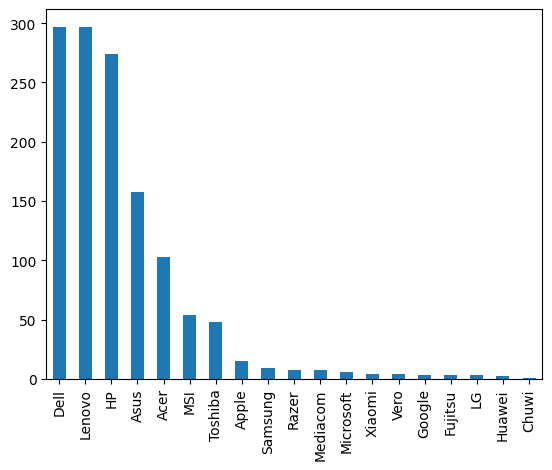

In [14]:
df['Company'].value_counts().plot(kind='bar')

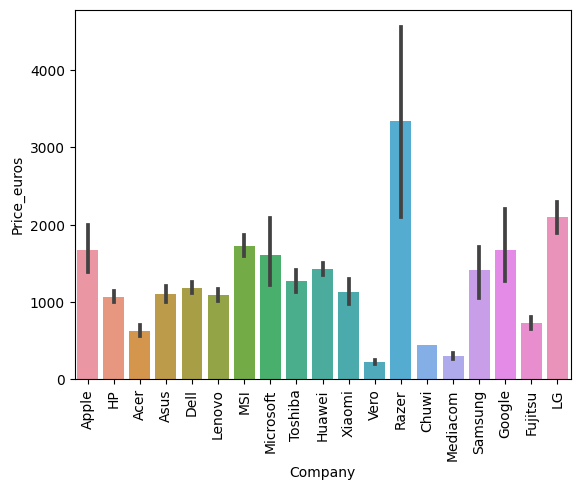

In [15]:
sns.barplot(x=df['Company'], y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:>

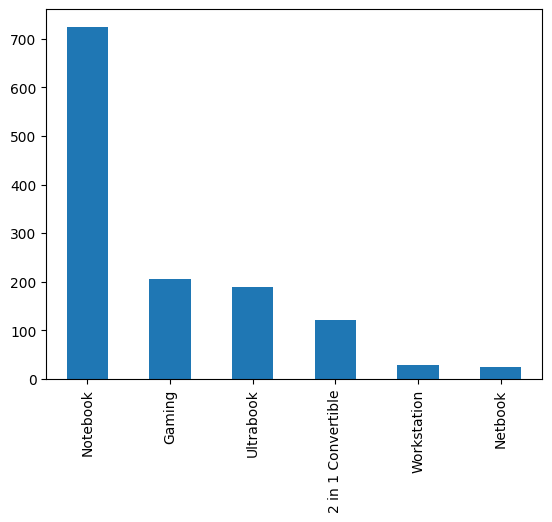

In [16]:
df['TypeName'].value_counts().plot(kind='bar')

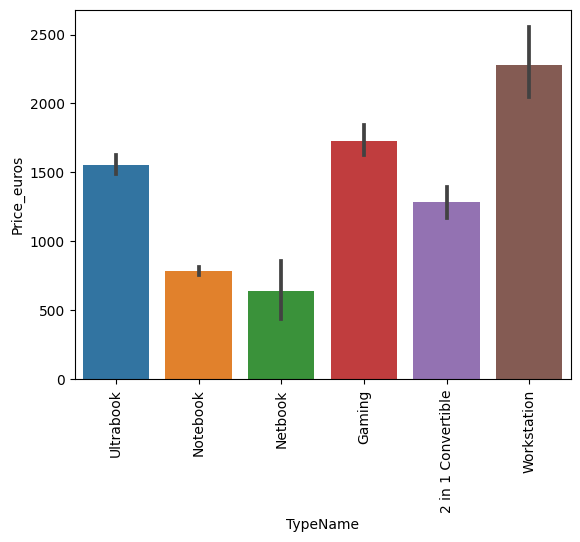

In [17]:
sns.barplot(x=df['TypeName'], y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

c:\Users\Lenovo\rekru_modelling\Supervised\myenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Inches', ylabel='Density'>

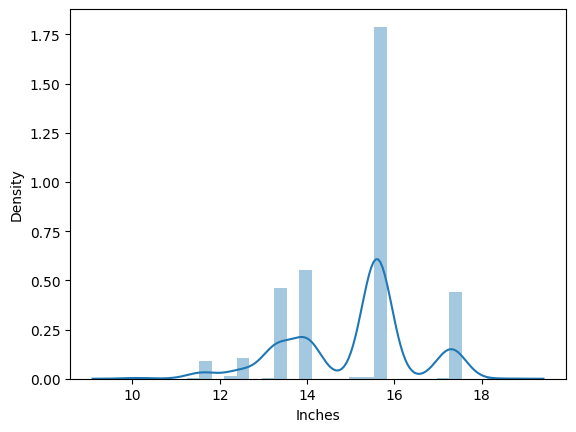

In [18]:
sns.distplot(df['Inches'])

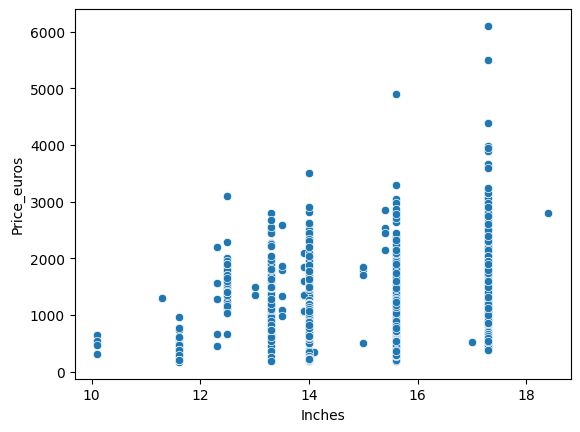

In [19]:
sns.scatterplot(x=df['Inches'], y=df['Price_euros'])
plt.show()

In [20]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [21]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS
1206,HP,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.91,579.0,0,0
1238,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.30,1169.0,0,0
1288,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,369.0,0,0
676,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.10,1135.0,0,0
787,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,4,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.40,999.0,0,1


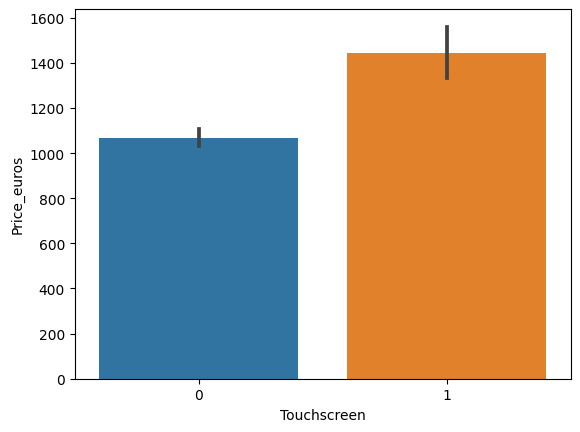

In [22]:
sns.barplot(x=df['Touchscreen'], y=df['Price_euros'])
plt.show()

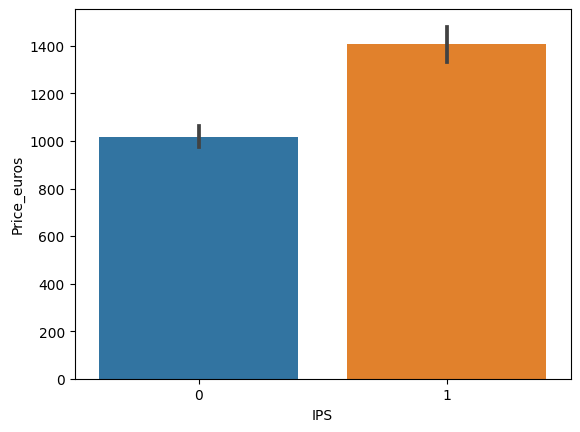

In [23]:
sns.barplot(x=df['IPS'], y=df['Price_euros'])
plt.show()

In [24]:
res = df['ScreenResolution'].str.split('x', n=1, expand=True)
df['X_resolution'] = res[0]
df['Y_resolution'] = res[1]
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,X_resolution,Y_resolution
1018,Toshiba,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.47,1490.0,0,1,IPS Panel Full HD 1920,1080
852,Dell,Notebook,17.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R7 M445,Linux,2.83,865.0,0,0,Full HD 1920,1080
762,Google,Ultrabook,12.3,Touchscreen 2400x1600,Intel Core i5 7Y57 1.2GHz,8,256GB SSD,Intel HD Graphics 615,Chrome OS,1.10,1559.0,1,0,Touchscreen 2400,1600
749,HP,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Xeon E3-1535M v5 2.9GHz,16,256GB SSD,Nvidia Quadro M2000M,Windows 7,3.00,4389.0,0,1,IPS Panel Full HD 1920,1080
148,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.90,2029.0,0,0,Full HD 1920,1080


In [25]:
df['X_resolution'] = df['X_resolution'].str[-4:]

In [26]:
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,X_resolution,Y_resolution
408,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.20,409.00,0,0,1920,1080
1062,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,1TB HDD,Intel HD Graphics,Windows 10,2.25,559.00,0,0,1920,1080
322,Asus,Notebook,14.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.00,1094.00,0,0,1920,1080
328,HP,Ultrabook,12.5,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.26,1335.00,0,0,1920,1080
614,Dell,Notebook,15.6,1366x768,Intel Core i5 7300U 2.6GHz,4,500GB HDD,Intel HD Graphics 620,Linux,1.93,869.00,0,0,1366,768
752,Asus,Notebook,15.6,1366x768,Intel Core i5 6300HQ 2.3GHz,4,1TB HDD,Nvidia GeForce GTX 950M,No OS,2.45,579.00,0,0,1366,768
880,HP,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,1.28,1700.00,1,0,1920,1080
1145,HP,Workstation,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,256GB SSD,Nvidia Quadro M1000M,Windows 7,2.00,1899.00,0,0,1920,1080
487,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06,1899.00,0,0,1920,1080
25,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 520,Windows 10,2.30,418.64,0,0,1366,768


In [27]:
df['X_resolution'] = df['X_resolution'].astype('int')
df['Y_resolution'] = df['Y_resolution'].astype('int')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1295 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1295 non-null   object 
 1   TypeName          1295 non-null   object 
 2   Inches            1295 non-null   float64
 3   ScreenResolution  1295 non-null   object 
 4   Cpu               1295 non-null   object 
 5   Ram               1295 non-null   int32  
 6   Memory            1295 non-null   object 
 7   Gpu               1295 non-null   object 
 8   OpSys             1295 non-null   object 
 9   Weight            1295 non-null   float64
 10  Price_euros       1295 non-null   float64
 11  Touchscreen       1295 non-null   int64  
 12  IPS               1295 non-null   int64  
 13  X_resolution      1295 non-null   int32  
 14  Y_resolution      1295 non-null   int32  
dtypes: float64(3), int32(3), int64(2), object(7)
memory usage: 146.7+ KB


In [29]:
df['PPI'] = df.apply(lambda row: np.sqrt(row['X_resolution']**2 + row['Y_resolution']**2) / row['Inches'], axis=1)

In [30]:
drops = ['ScreenResolution', 'X_resolution', 'Y_resolution','Inches']

df.drop(columns=drops, inplace=True)

In [31]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005


In [32]:
df['SSD'] = df['Memory'].apply(lambda value: value if 'SSD'  in value else '0')
df['SSD'] = df['SSD'].apply(lambda value: '0' if '+' in value else value)
df['SSD']
SSD = df['SSD'].str.split('SSD', n=1, expand=True)
df['SSD'] = SSD[0]
df['SSD'] = df['SSD'].str.replace('GB','')
df['SSD'] = df['SSD'].apply(lambda value: int(value.split('TB')[0]) * 1024 if 'TB' in value else value)

In [33]:
df['HDD'] = df['Memory'].apply(lambda value: value if 'HDD' in value else '0')
HDD = df['HDD'].str.split('HDD', n=1, expand=True)
df['HDD'] = HDD[0]
df['HDD'] = df['HDD'].str.replace('GB','')
df['HDD'] = df['HDD'].apply(lambda value: value[-4:] if 'TB' in value else value)
df['HDD'] = df['HDD'].apply(lambda value: '0' if '+' in value else value)
df['HDD'] = df['HDD'].apply(lambda value: int(value.split('TB')[0]) * 1024 if 'TB' in value else value)

In [34]:
df['FS'] = df['Memory'].apply(lambda value: value if 'Flash Storage' in value else '0')
FS = df['FS'].str.split('Flash Storage', n=1, expand=True)
df['FS'] = FS[0]
df['FS'] = df['FS'].str.replace('GB','')
df['FS'] = df['FS'].apply(lambda value: int(value.split('TB')[0]) * 1024 if 'TB' in value else value)

In [35]:
df.drop(columns=['Memory'], inplace=True)

In [36]:
df['SSD'] = df['SSD'].astype('int')
df['HDD'] = df['HDD'].astype('int')
df['FS'] = df['FS'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1295 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1295 non-null   object 
 1   TypeName     1295 non-null   object 
 2   Cpu          1295 non-null   object 
 3   Ram          1295 non-null   int32  
 4   Gpu          1295 non-null   object 
 5   OpSys        1295 non-null   object 
 6   Weight       1295 non-null   float64
 7   Price_euros  1295 non-null   float64
 8   Touchscreen  1295 non-null   int64  
 9   IPS          1295 non-null   int64  
 10  PPI          1295 non-null   float64
 11  SSD          1295 non-null   int32  
 12  HDD          1295 non-null   int32  
 13  FS           1295 non-null   int32  
dtypes: float64(3), int32(4), int64(2), object(5)
memory usage: 131.5+ KB


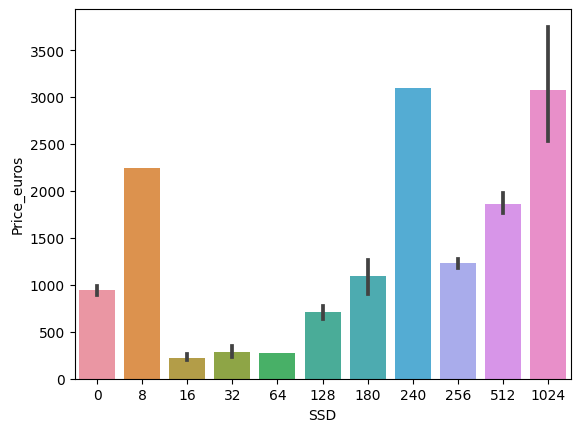

In [37]:
sns.barplot(x=df['SSD'], y=df['Price_euros'])
plt.show()

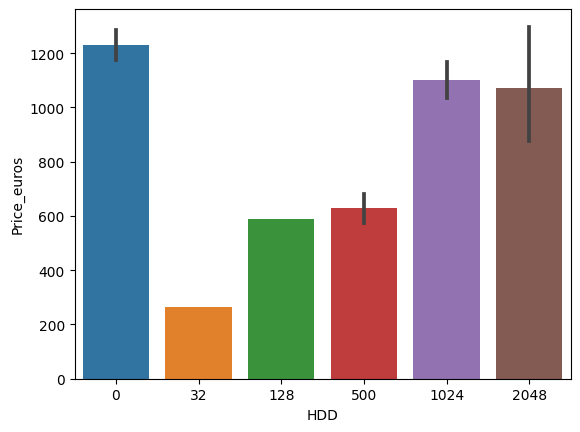

In [38]:
sns.barplot(x=df['HDD'], y=df['Price_euros'])
plt.show()

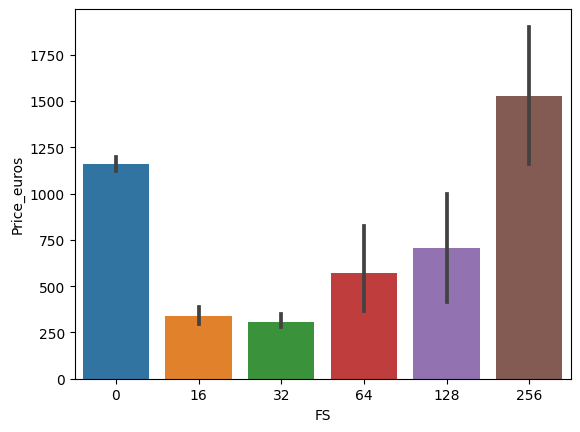

In [39]:
sns.barplot(x=df['FS'], y=df['Price_euros'])
plt.show()

In [40]:
df.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,SSD,HDD,FS
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,128,0,0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,0,0,128
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,256,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,512,0,0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,256,0,0


In [41]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz               190
Intel Core i7 7700HQ 2.8GHz              146
Intel Core i7 7500U 2.7GHz               134
Intel Core i7 8550U 1.8GHz                73
Intel Core i5 8250U 1.6GHz                72
                                        ... 
Intel Core i7 2.2GHz                       1
Intel Core M M3-6Y30 0.9GHz                1
AMD A9-Series 9420 2.9GHz                  1
Intel Celeron Dual Core N3060 1.60GHz      1
AMD A6-Series 7310 2GHz                    1
Name: Cpu, Length: 113, dtype: int64

In [42]:
df['Cpu_x'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [43]:
def pilah_processor(proc):
    if proc == 'Intel Core i7' or proc == 'Intel Core i5' or proc == 'Intel Core i3':
        return proc
    elif proc.split()[0] == 'Intel':
        return 'Other Intel'
    else:
        return 'AMD'
    
df['Brand_Cpu'] = df['Cpu_x'].apply(pilah_processor)
        

In [44]:
df['Brand_Cpu'].value_counts()

Intel Core i7    527
Intel Core i5    422
Other Intel      147
Intel Core i3    136
AMD               63
Name: Brand_Cpu, dtype: int64

In [45]:
df.drop(columns=['Cpu', 'Cpu_x'], inplace=True)

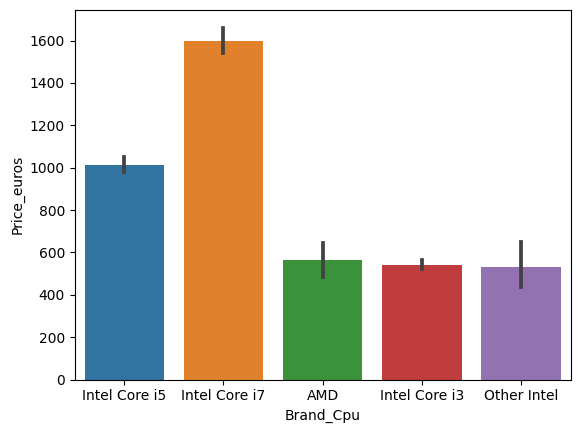

In [46]:
sns.barplot(x=df['Brand_Cpu'], y=df['Price_euros'])
plt.show()

In [47]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,SSD,HDD,FS,Brand_Cpu
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,128,0,0,Intel Core i5
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,0,0,128,Intel Core i5
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,256,0,0,Intel Core i5
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,512,0,0,Intel Core i7
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,256,0,0,Intel Core i5


In [48]:
df['Brand_Gpu'] = df['Gpu'].apply(lambda x:x.split()[0])

In [49]:
df.drop(columns=['Gpu'], inplace=True)

In [50]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,SSD,HDD,FS,Brand_Cpu,Brand_Gpu
0,Apple,Ultrabook,8,macOS,1.37,1339.69,0,1,226.983005,128,0,0,Intel Core i5,Intel
1,Apple,Ultrabook,8,macOS,1.34,898.94,0,0,127.677940,0,0,128,Intel Core i5,Intel
2,HP,Notebook,8,No OS,1.86,575.00,0,0,141.211998,256,0,0,Intel Core i5,Intel
3,Apple,Ultrabook,16,macOS,1.83,2537.45,0,1,220.534624,512,0,0,Intel Core i7,AMD
4,Apple,Ultrabook,8,macOS,1.37,1803.60,0,1,226.983005,256,0,0,Intel Core i5,Intel


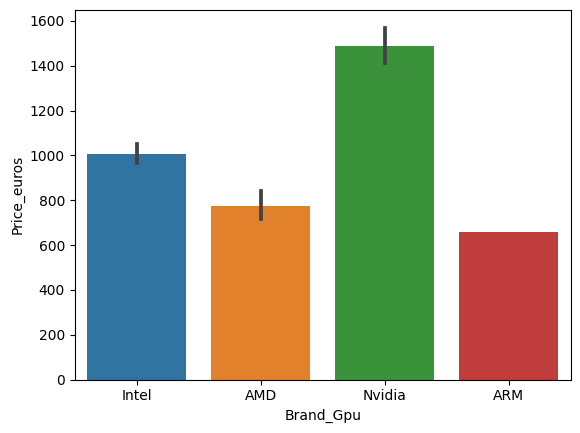

In [51]:
sns.barplot(x=df['Brand_Gpu'], y=df['Price_euros'])
plt.show()

In [52]:
df['OpSys'].value_counts()

Windows 10      1070
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             11
Windows 10 S       8
Mac OS X           4
Android            2
Name: OpSys, dtype: int64

In [53]:
def pilah_Ops(Ops):
    if Ops == 'Windows 10' or Ops == 'Windows 10 S' or Ops == 'Windows 7':
        return 'Windows'
    elif Ops == 'macOS' or Ops == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others'
    
df['OS'] = df['OpSys'].apply(pilah_Ops)

In [54]:
df['OS'].value_counts()

Windows    1123
Others      157
Mac          15
Name: OS, dtype: int64

In [55]:
df.drop(columns=['OpSys'], inplace=True)

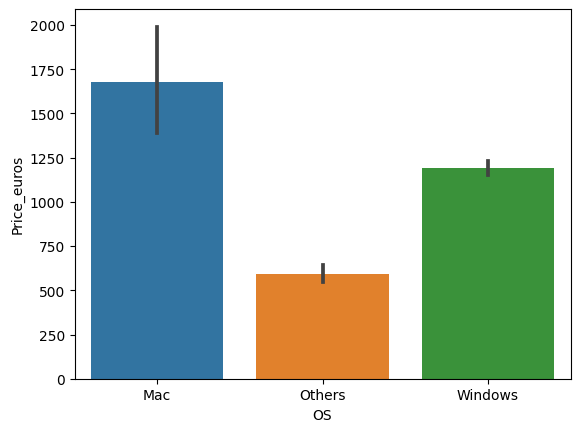

In [56]:
sns.barplot(x=df['OS'], y=df['Price_euros'])
plt.show()

In [57]:
df.head()

,Company,TypeName,Ram,Weight,Price_euros,Touchscreen,IPS,PPI,SSD,HDD,FS,Brand_Cpu,Brand_Gpu,OS
0,Apple,Ultrabook,8,1.37,1339.69,0,1,226.983005,128,0,0,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,8,1.34,898.94,0,0,127.677940,0,0,128,Intel Core i5,Intel,Mac
2,HP,Notebook,8,1.86,575.00,0,0,141.211998,256,0,0,Intel Core i5,Intel,Others
3,Apple,Ultrabook,16,1.83,2537.45,0,1,220.534624,512,0,0,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,8,1.37,1803.60,0,1,226.983005,256,0,0,Intel Core i5,Intel,Mac


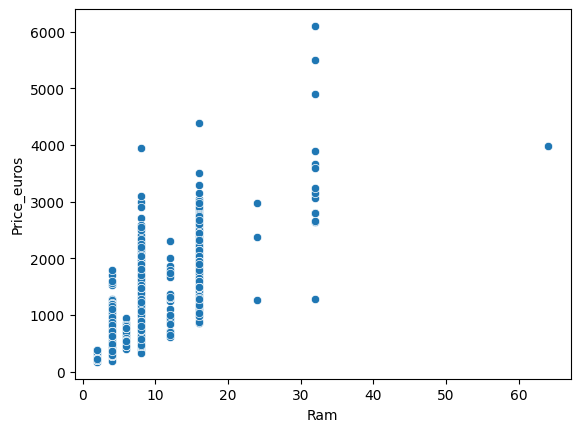

In [58]:
sns.scatterplot(x=df['Ram'], y=df['Price_euros'])
plt.show()

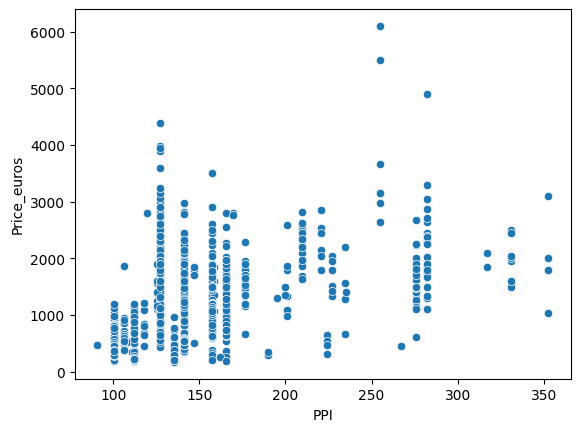

In [59]:
sns.scatterplot(x=df['PPI'], y=df['Price_euros'])
plt.show()

In [60]:
df.corr()['Price_euros']

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13868\3238765375.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price_euros']


Ram            0.742888
Weight         0.213367
Price_euros    1.000000
Touchscreen    0.191219
IPS            0.251280
PPI            0.475792
SSD            0.466416
HDD           -0.094886
FS            -0.062653
Name: Price_euros, dtype: float64

In [61]:
df.head()

,Company,TypeName,Ram,Weight,Price_euros,Touchscreen,IPS,PPI,SSD,HDD,FS,Brand_Cpu,Brand_Gpu,OS
0,Apple,Ultrabook,8,1.37,1339.69,0,1,226.983005,128,0,0,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,8,1.34,898.94,0,0,127.677940,0,0,128,Intel Core i5,Intel,Mac
2,HP,Notebook,8,1.86,575.00,0,0,141.211998,256,0,0,Intel Core i5,Intel,Others
3,Apple,Ultrabook,16,1.83,2537.45,0,1,220.534624,512,0,0,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,8,1.37,1803.60,0,1,226.983005,256,0,0,Intel Core i5,Intel,Mac


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13868\3329040595.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, annot_kws={'size': 15})


<AxesSubplot:>

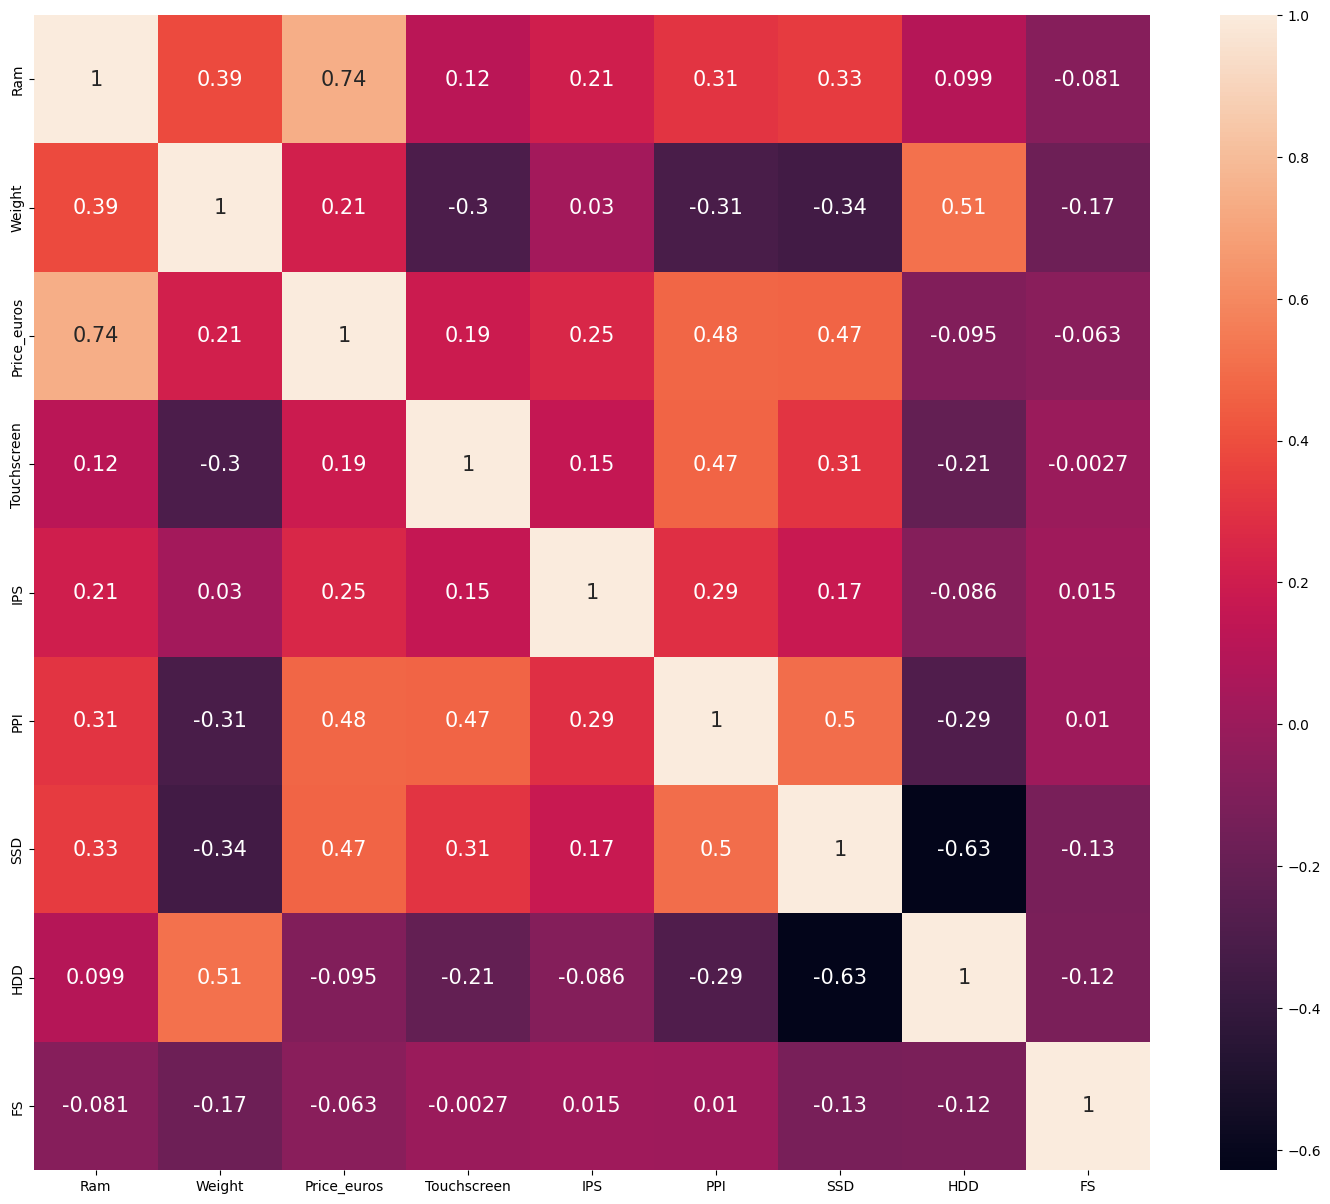

In [62]:
plt.figure(figsize=(18, 15))
sns.heatmap(df.corr(), annot=True, annot_kws={'size': 15})

In [63]:
drops = ['FS']

df.drop(columns=drops, inplace=True)

c:\Users\Lenovo\rekru_modelling\Supervised\myenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price_euros', ylabel='Density'>

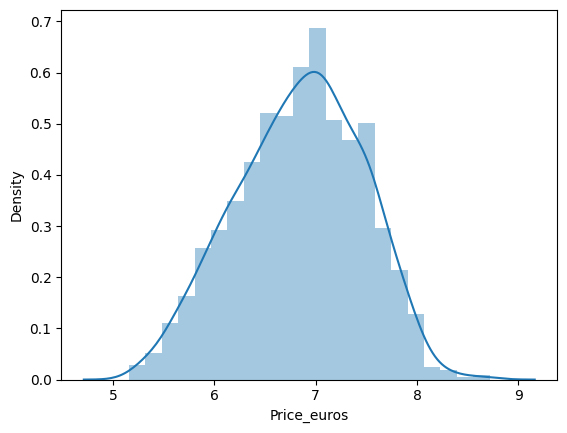

In [64]:
sns.distplot(np.log(df['Price_euros']))

# Modelling

In [65]:
kolom_swap = 'Price_euros'

kolom = df.pop(kolom_swap)
df['Price_euros'] = kolom

In [66]:
X = df.drop(columns=['Price_euros'])
y = np.log(df['Price_euros'])

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [68]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,IPS,PPI,SSD,HDD,Brand_Cpu,Brand_Gpu,OS
191,Vero,Notebook,4,1.30,0,1,157.350512,0,0,Other Intel,Intel,Windows
192,Xiaomi,Ultrabook,8,1.30,0,1,165.632118,256,0,Intel Core i5,Nvidia,Others
767,Dell,Gaming,16,2.72,1,1,282.423996,0,1024,Intel Core i7,Nvidia,Windows
784,Lenovo,Ultrabook,16,1.70,0,0,157.350512,512,0,Intel Core i7,Intel,Windows
393,MSI,Gaming,8,2.70,0,0,127.335675,256,0,Intel Core i7,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
719,HP,Notebook,8,2.63,0,0,127.335675,256,0,Intel Core i7,Nvidia,Windows
910,Dell,Notebook,8,1.60,0,0,157.350512,256,0,Intel Core i5,Intel,Windows
1102,Acer,Notebook,4,2.20,0,0,100.454670,16,0,Other Intel,Intel,Others
238,Asus,Gaming,32,4.70,0,0,127.335675,0,1024,Intel Core i7,Nvidia,Windows


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1295 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1295 non-null   object 
 1   TypeName     1295 non-null   object 
 2   Ram          1295 non-null   int32  
 3   Weight       1295 non-null   float64
 4   Touchscreen  1295 non-null   int64  
 5   IPS          1295 non-null   int64  
 6   PPI          1295 non-null   float64
 7   SSD          1295 non-null   int32  
 8   HDD          1295 non-null   int32  
 9   Brand_Cpu    1295 non-null   object 
 10  Brand_Gpu    1295 non-null   object 
 11  OS           1295 non-null   object 
 12  Price_euros  1295 non-null   float64
dtypes: float64(3), int32(3), int64(2), object(5)
memory usage: 126.5+ KB


In [70]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

cat = df.select_dtypes(include = object).columns
cat = cat.tolist()

Encode = ColumnTransformer(transformers=[
    ('Cat', OneHotEncoder(sparse=False, drop='first',handle_unknown='ignore', categories='auto'),[0,1,9,10,11] )],remainder='passthrough')


# Model : XGBRegressor

MAE: 0.14810223045321377
R2: 0.9035957459894369


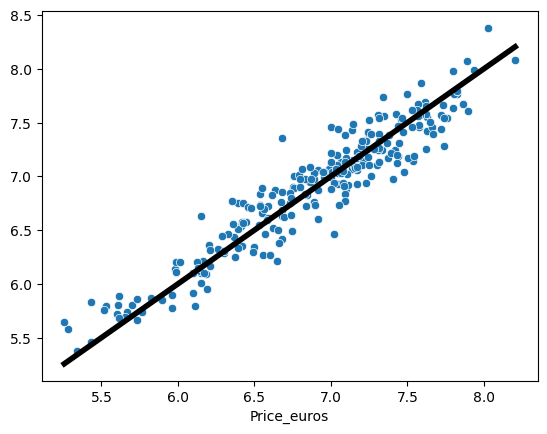

In [71]:
from xgboost import XGBRegressor

model = XGBRegressor(learning_rate=0.5, n_estimators=100, max_depth=4)

XGBR = Pipeline ([
    ('Encode', Encode),
    ('Model', model)
])

XGBR.fit(X_train,y_train)
y_pred = XGBR.predict(X_test)
y_pred

from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score

print('MAE:', MAE(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-', lw=4)
plt.show()

# RandomForestRegressor

MAE: 0.15569335178852312
R2: 0.8935413154581261


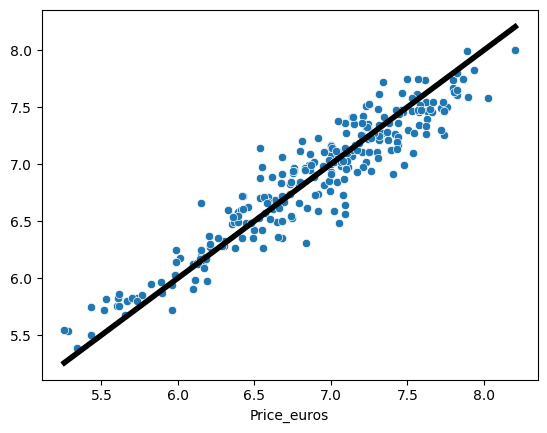

In [72]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200, max_depth=600, max_features=10, random_state=2)

RF = Pipeline ([
    ('Encode', Encode),
    ('Model', model)
])

RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
y_pred

from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score

print('MAE:', MAE(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-', lw=4)
plt.show()

# GradientBoostRegressor

MAE: 0.14685559946687518
R2: 0.9105388808925106


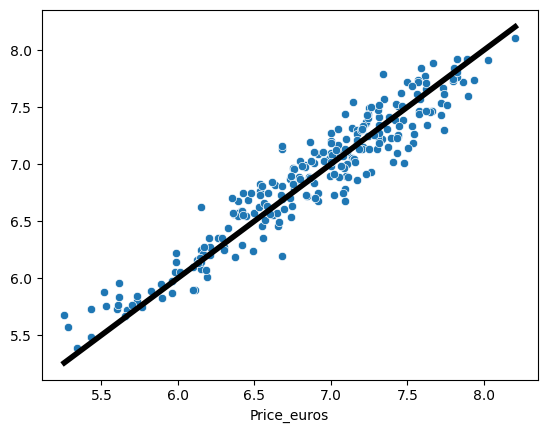

In [73]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(loss='squared_error', learning_rate=0.2, n_estimators=200, max_depth=4, random_state=2)

GBR = Pipeline ([
    ('Encode', Encode),
    ('Model', model)
])

GBR.fit(X_train,y_train)
y_pred = GBR.predict(X_test)
y_pred

from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score

print('MAE:', MAE(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-', lw=4)
plt.show()

# LinearRegression

MAE: 0.20003162239475422
R2: 0.8219519076501006


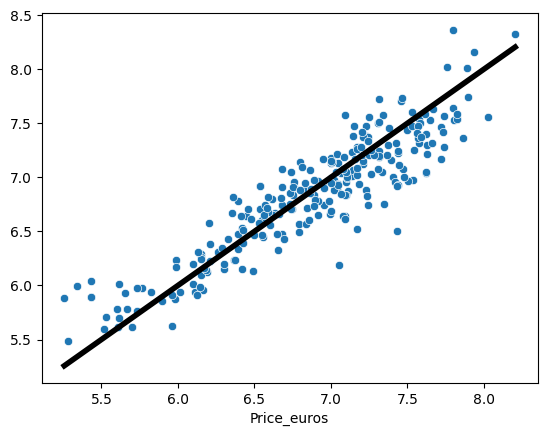

In [74]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

LR = Pipeline ([
    ('Encode', Encode),
    ('Model', model)
])

LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
y_pred

from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score

print('MAE:', MAE(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-', lw=4)
plt.show()

In [75]:
import pickle

pickle.dump(df, open('df.pkl', 'wb'))
pickle.dump(GBR, open('model.pkl', 'wb'))